# Домашнее задание по статистическому анализу на python

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [102]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [103]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

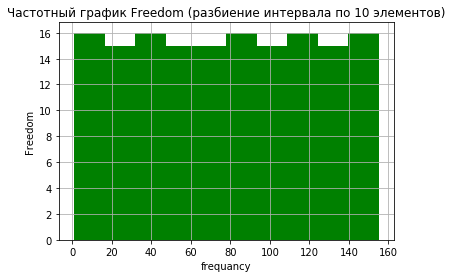

In [104]:
n, bins, patches = plt.hist(df['Freedom'], 10, facecolor='g')

plt.xlabel('frequancy')
plt.ylabel('Freedom')
plt.title('Частотный график Freedom (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

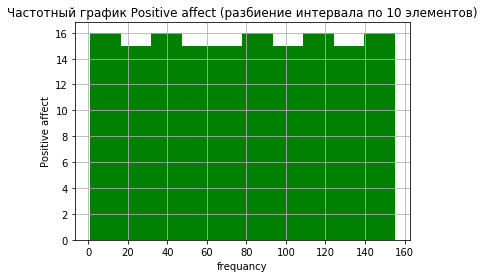

In [105]:
n, bins, patches = plt.hist(df['Positive affect'], 10, facecolor='g')

plt.xlabel('frequancy')
plt.ylabel('Positive affect')
plt.title('Частотный график Positive affect (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

На обоих графиках мы видим равномерное распределение.

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [106]:
# медиана
statistics.median(df['Freedom'])

71.0

In [107]:
# мода
statistics.median(df['Freedom'])

71.0

In [108]:
# математическое ожидание
statistics.mean(df['Freedom'])

nan

In [109]:
# похоже, есть выбросы. Проверим:
df['Freedom'].isnull().sum()

1

In [111]:
# удалим выбросы
df = df.loc[df['Country (region)']!='Qatar']
# и пересчитаем математическое ожидание:

In [112]:
# математическое ожидание
statistics.mean(df['Freedom'])

78.0

In [113]:
# стандартное отклонение
statistics.pstdev(df['Freedom'])

44.74371464239419

In [114]:
# дисперсия
statistics.pvariance(df['Freedom'])

2002.0

In [115]:
# Минимум
min(df['Freedom'])

1.0

In [116]:
# Максимум
max(df['Freedom'])

155.0

In [117]:
# размах
duration_range = max(df['Freedom']) - min(df['Freedom'])
print(duration_range)

154.0


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

In [58]:
#Чтобы приступать к расчетам коэффициента корреляции r-Пирсона необходимо выполнение следующих условий:

In [61]:
#1.Исследуемые переменные X и Y должны быть распределены нормально.
# Выше мы определили, что Freedom и positive affect распределены равномерно.

In [ ]:
#2. Исследуемые переменные X и Y должны быть измерены в интервальной шкале или шкале отношений:
# не могу определить

In [57]:
# 3.Количество значений в исследуемых переменных X и Y должно быть одинаковым. Кличество действительно одинаковое:

In [118]:
len(df['Freedom'])

155

In [119]:
len(df['Positive affect'])

155

In [120]:
# Вроде как не все условия выполняются, но попробуем найти корреляцию :)

Коэффициент корреляции Пирсона: 0.6817698430601656


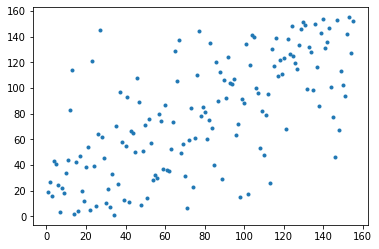

In [121]:
from scipy.stats import pearsonr

x = df['Freedom']
y = df['Positive affect']

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)
# коэффициент стремится к единице, можно говорить о том, что между Freedom и positive affect есть положительная корреляция, 
# то есть рост одного фактора ведет к росту другого

In [122]:
corr, p_value = pearsonr(df['Freedom'],df['Positive affect'])
print(corr)

0.6817698430601656


Нормализовать данные колонки Freedom (централизация + масштабирование)

In [123]:
#Так как среднее значение не равно 0, необходимо нормализовать.
duration = df['Freedom']
duration_1 = duration - statistics.mean(duration)
print(statistics.mean(duration_1))

0.0


In [124]:
min(duration_1)

-77.0

In [125]:
max(duration_1)

77.0

In [126]:
# Масштабирование выборки

# Разброс данных приводим к виду (0,1) либо (-1,1)

In [127]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

duration_2 = min_max_scaler.fit_transform(np.array(duration_1).reshape(-1, 1))
print(min(duration_2))
print(max(duration_2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

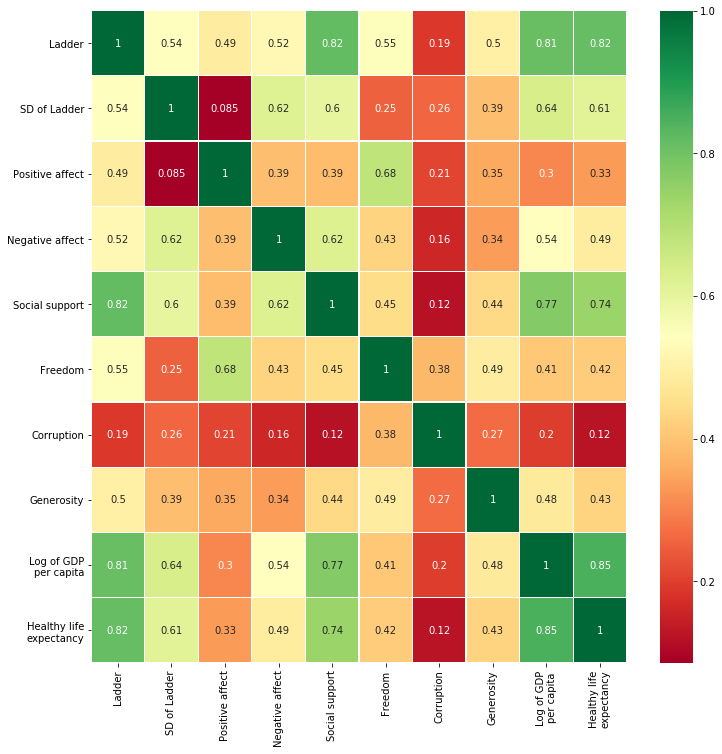

In [128]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить следующую таблицу: 

In [129]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df2=pd.read_csv(url)
df2[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

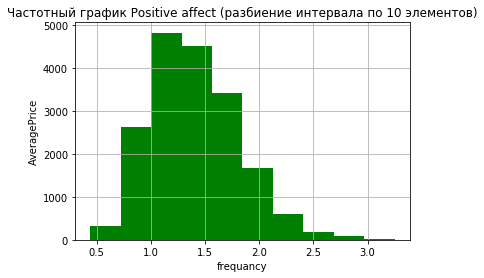

In [130]:
n, bins, patches = plt.hist(df2['AveragePrice'], 10, facecolor='g')

plt.xlabel('frequancy')
plt.ylabel('AveragePrice')
plt.title('Частотный график Positive affect (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

# график похож на нормальное распределение

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

In [131]:
corr, p_value = pearsonr(df2['4046'],df2['AveragePrice'])
print(corr)

-0.20831704848788477


Коэффициент корреляции Пирсона: -0.20831704848788477


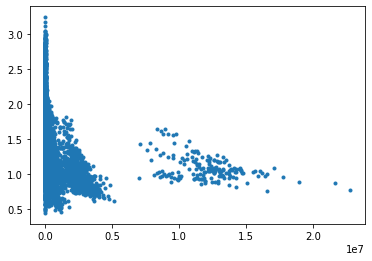

In [132]:
from scipy.stats import pearsonr

x = df2['4046']
y = df2['AveragePrice']

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

In [ ]:
# Корреляции нет.